In [3]:
# !pip install qiskit==1.4.2
# !pip install qiskit_aer
# !pip install qiskit_machine_learning
# !pip install qiskit_algorithms
# !pip install matplotlib
# !pip install pylatexenc
# !pip install scipy
# !pip install -U scikit-learn

# !git clone https://github.com/IsaVia777/atelier_qml.git

# Lab 1: Circuits quantiques avec Qiskit

**Objectifs:**
* Introduction du jeu de données Iris
* Application de portes quantiques avec Qiskit
* Exécution d'un circuit quantique
* Interprétation du résultat de la mesure d'un circuit quantique

In [4]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, QasmSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector

SEED = 8398

In [5]:
# import sys
# sys.path.insert(0, '/content/atelier_qml')

from utils import *

Vous devriez pouvoir éxécuter la cellule suivante si le fichier utils.py se trouve dans le même dossier que ce notebook.

In [6]:
test_function()

Exercises ready!


## Le jeu de données Iris

In [7]:
# Charger le jeu de données Iris
# Composé de 150 items, 3 classes, 4 caractéristiques
iris = datasets.load_iris()

nb_features = 4

for i in range(0, len(iris["data"]), 15):
    print(f'Vecteur: {iris["data"][i]} -- étiquette: {iris["target"][i]}')

Vecteur: [5.1 3.5 1.4 0.2] -- étiquette: 0
Vecteur: [5.7 4.4 1.5 0.4] -- étiquette: 0
Vecteur: [4.8 3.1 1.6 0.2] -- étiquette: 0
Vecteur: [4.8 3.  1.4 0.3] -- étiquette: 0
Vecteur: [5.  2.  3.5 1. ] -- étiquette: 1
Vecteur: [6.6 3.  4.4 1.4] -- étiquette: 1
Vecteur: [5.5 2.6 4.4 1.2] -- étiquette: 1
Vecteur: [7.6 3.  6.6 2.1] -- étiquette: 2
Vecteur: [6.9 3.2 5.7 2.3] -- étiquette: 2
Vecteur: [7.7 3.  6.1 2.3] -- étiquette: 2


In [8]:
# Classification binaire, on conserve seulement les classes 0 et 1
nb_classes = 2
Y = iris.target[:100] 

# Normalisation
X = np.array([x / np.linalg.norm(x) for x in iris.data[:100]]) 

for i in range(0, len(X), 15):
    print(f'Vecteur: {X[i]} -- étiquette: {Y[i]}')
print(f'Taille du jeu de données: {len(X)}')

Vecteur: [0.80377277 0.55160877 0.22064351 0.0315205 ] -- étiquette: 0
Vecteur: [0.77381111 0.59732787 0.2036345  0.05430253] -- étiquette: 0
Vecteur: [0.80846584 0.52213419 0.26948861 0.03368608] -- étiquette: 0
Vecteur: [0.82210585 0.51381615 0.23978087 0.05138162] -- étiquette: 0
Vecteur: [0.76923077 0.30769231 0.53846154 0.15384615] -- étiquette: 1
Vecteur: [0.76785726 0.34902603 0.51190484 0.16287881] -- étiquette: 1
Vecteur: [0.72337118 0.34195729 0.57869695 0.15782644] -- étiquette: 1
Taille du jeu de données: 100


In [9]:
# Partition de l'ensemble d'entraînement et de test
test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_ratio, random_state=SEED, stratify=Y)
print(f"Taille de l'ensemble d'entraînement: {len(x_train)}\nTaille de l'ensemble de test: {len(x_test)}")

Taille de l'ensemble d'entraînement: 80
Taille de l'ensemble de test: 20


In [10]:
x_train[0]

array([0.776114  , 0.54974742, 0.30721179, 0.03233808])

## Application de portes quantiques avec Qiskit

### Visualisation de l'état d'un qubit avec la sphère de Bloch

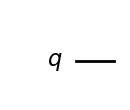

In [11]:
qc = QuantumCircuit(1)
qc.draw('mpl')

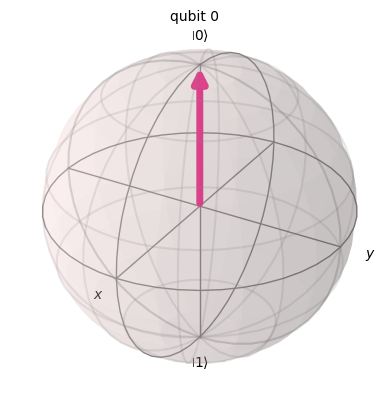

In [12]:
def bloch_0():
    """
    Circuit quantique qui prépare l'état |0>
    """
    return qc

state = Statevector.from_instruction(bloch_0()) # Retourne le vecteur d'état résultant d'une instruction (circuit)
plot_bloch_multivector(state)

### Porte $X$

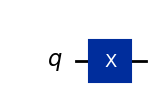

In [13]:
def bloch_x():
    """
    Circuit quantique qui prépare l'état |1>
    """
    qc = QuantumCircuit(1)
    qc.x(0)
    return qc

bloch_x().draw('mpl')

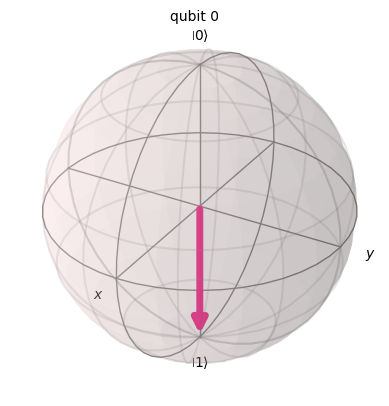

In [14]:
state = Statevector.from_instruction(bloch_x())
plot_bloch_multivector(state)

### Superposition avec la porte $H$

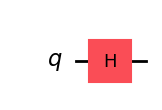

In [15]:
def bloch_h():
    """
    Circuit quantique qui prépare l'état sqrt(0.5)(|0> + |1>)
    """
    qc = QuantumCircuit(1)
    qc.h(0)
    return qc

bloch_h().draw('mpl')

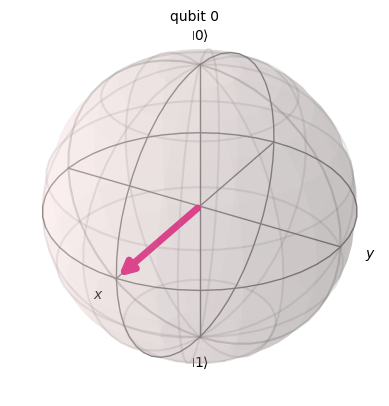

In [16]:
state = Statevector.from_instruction(bloch_h())
plot_bloch_multivector(state)

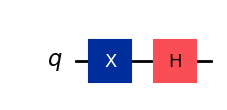

In [17]:
def bloch_xh():
    """
    Circuit quantique qui prépare l'état sqrt(0.5)(|0> - |1>)
    """
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.h(0)
    return qc

bloch_xh().draw('mpl')

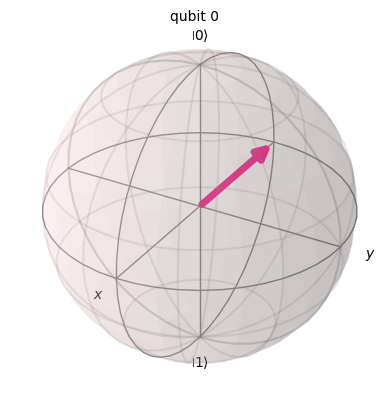

In [18]:
state = Statevector.from_instruction(bloch_xh())
plot_bloch_multivector(state)

### Porte $Z$

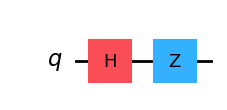

In [19]:
def bloch_hz():
    """
    Circuit quantique qui prépare l'état sqrt(0.5)(|0> - |1>)
    """
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.z(0)
    return qc

bloch_hz().draw('mpl')

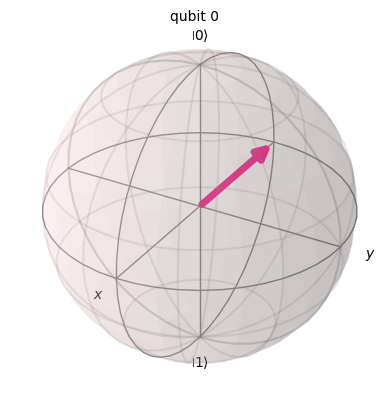

In [20]:
state = Statevector.from_instruction(bloch_hz())
plot_bloch_multivector(state)

### Rotations paramétrées ($RX$, $RY$, $RZ$)

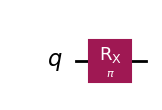

In [21]:
def bloch_rx(angle):
    """
    Circuit qui applique une rotation autour de l'axe X
    """
    qc = QuantumCircuit(1)
    qc.rx(angle, 0) 
    return qc

def bloch_ry(angle):
    """
    Circuit qui applique une rotation autour de l'axe Y
    """
    qc = QuantumCircuit(1)
    qc.ry(angle, 0) 
    return qc

def bloch_rz(angle):
    """
    Circuit qui applique une rotation autour de l'axe Z
    """
    qc = QuantumCircuit(1)
    qc.rz(angle, 0) 
    return qc


bloch_rx(pi).draw('mpl')

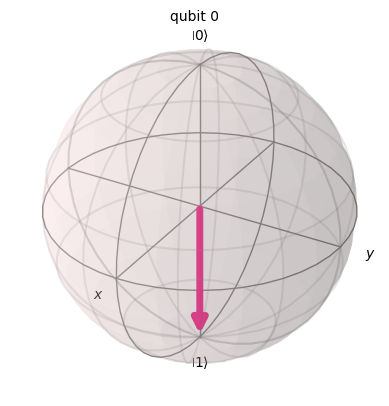

In [22]:
# Une rotation de PI autour de l'axe X est équivalent à appliquer une porte X:
state = Statevector.from_instruction(bloch_rx(pi))
plot_bloch_multivector(state)

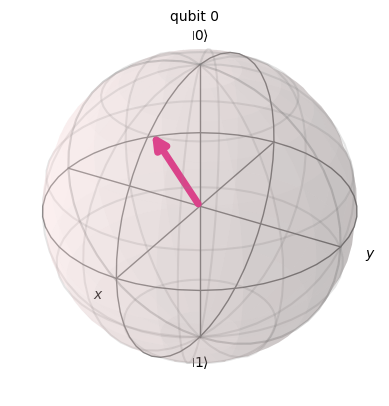

In [23]:
# Essayez avec différents angles pour les portes RX, RY et RZ
state = Statevector.from_instruction(bloch_ry(pi/5))
plot_bloch_multivector(state)

### Porte $CX$ à deux qubits: exemple avec l'état GHZ

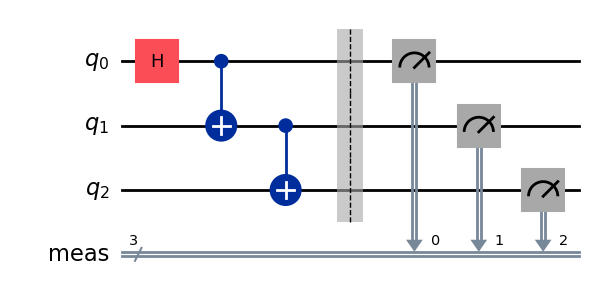

In [24]:
qc = QuantumCircuit(3) 
qc.h(0)
qc.cx(0, 1)  # 1er paramètre identifie qubit de contrôle, 2e paramètre identifie qubit cible
qc.cx(1, 2)
qc.measure_all() 
qc.draw('mpl')

Ce circuit produit l'état $|\Psi\rangle$ =  $\frac{1}{\sqrt{2}}|000\rangle + \frac{1}{\sqrt{2}}|111\rangle$.<br>
Une fois la mesure effectuée, les qubits seront soit dans l'état $|000\rangle$, soit dans l'état $|111\rangle$, avec une probabilité de $\frac{1}{2}$ pour chaque état.

## Exécution du circuit sur un simulateur

Pour accumuler des statistiques sur l'état quantique qu'on mesure, on exécute le même circuit plusieurs fois avec le paramètre *shots*.

In [25]:
simulator = QasmSimulator()

{'000': 511, '111': 513}


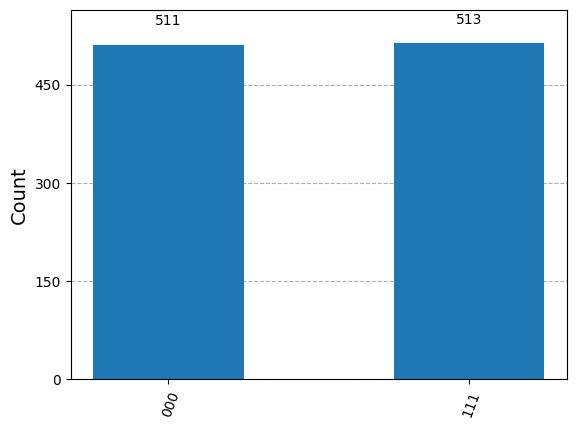

In [26]:
result = simulator.run(qc, shots=1024, seed_simulator=SEED).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

## Exercice 1
Créez le circuit quantique ci-dessous et exécutez-le en utilisant le *qasm_simulator*.

![ex1.png](ex1.png)

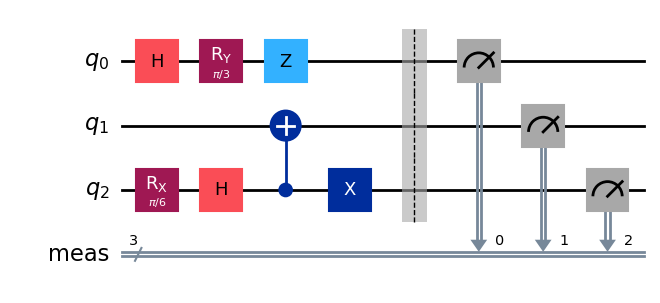

In [33]:
## Votre code ici 
qc = QuantumCircuit(3)
qc.h(0)
qc.ry(pi/3, 0)
qc.rx(pi/6, 2)
qc.h(2)
qc.z(0)
qc.cx(2, 1)
qc.x(2)
qc.measure_all()
###
qc.draw('mpl')

Utilisez le *qasm_sim* comme ressource de calcul, *1000* shots and n'oubliez pas d'inclure la *SEED*.

{'011': 472, '101': 466, '010': 32, '100': 30}


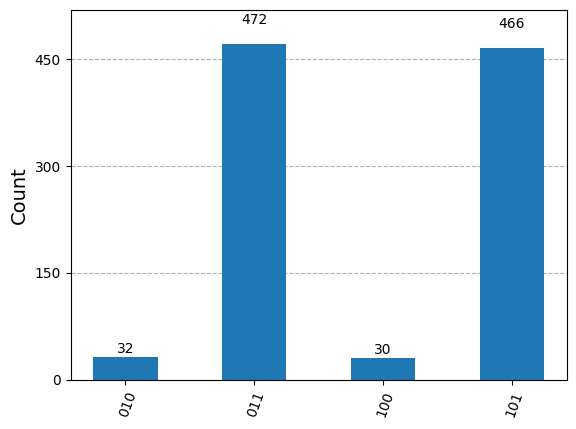

In [36]:
## Exécutez le circuit et obtenez l'histogramme des mesures

result = simulator.run(qc, shots=1000, seed_simulator=SEED).result()
counts = result.get_counts()
###
print(counts)
plot_histogram(counts)

**Vous devriez obtenir le résultat suivant: {'010': 32, '011': 472, '100': 30, '101': 466}**